<a href="https://colab.research.google.com/github/iamnotpi/PyTorch-models/blob/main/MNIST_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

torch.__version__

'2.2.1+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class LeNet_5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2d(1, 6, 5, 1, padding=2) # The original LeNet-5 expects images of size 32x32 as inputs, but in the MNIST dataset the images are of size 28x28
        self.avgpool_1 = nn.AvgPool2d(2, 2)
        self.conv_2 = nn.Conv2d(6, 16, 5, 1)
        self.avgpool_2 = nn.AvgPool2d(2, 2)
        self.conv_3 = nn.Conv2d(16, 120, 5, 1)
        self.flatten = nn.Flatten()
        self.linear_1 = nn.Linear(120, 84)
        self.linear_2 = nn.Linear(84, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        z = self.relu(self.conv_1(x))
        z = self.avgpool_1(z)
        z = self.relu(self.conv_2(z))
        z = self.avgpool_2(z)
        z = self.relu(self.conv_3(z))
        z = self.flatten(z)
        return self.linear_2(self.relu(self.linear_1(z)))

In [ ]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = torch.from_numpy(X_train).type(torch.float).to(device)
X_test = torch.from_numpy(X_test).type(torch.float).to(device)
y_train = torch.from_numpy(y_train).type(torch.long).to(device)
y_test = torch.from_numpy(y_test).type(torch.long).to(device)

In [ ]:
X_train.shape, y_train.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [ ]:
X_test.shape, y_test.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

In [ ]:
X_train = X_train.reshape((-1, 1, 28, 28))
X_test = X_test.reshape((-1, 1, 28, 28))

In [ ]:
def to_one_hot(labels, num_classes):
    one_hot_encoded = torch.zeros((labels.shape[0], num_classes))
    for label in range(labels.shape[0]):
        one_hot_encoded[label, int(labels[label].item())-1] = 1 # .item() get the scalar value from a 0-d tensor
    return one_hot_encoded

In [ ]:
# y_train = to_one_hot(y_train, 10)
# y_test = to_one_hot(y_test, 10)

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(train_loss, val_loss):
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

In [ ]:
model_0 = LeNet_5().to(device)

def train(model, X, y, batch_size=20, epochs=40, val_split=0.2):
    optimizer = torch.optim.Adam(params=model.parameters())
    loss_fn = nn.CrossEntropyLoss()
    train_loss_array = []
    val_loss_array = []
    # Split the training set and the validation set
    val_size = int(val_split * len(X))
    X_train = X[val_size:]
    y_train = y[val_size:]

    batches = len(X_train) // batch_size # Total number of batches
    loss = 0.0

    for epoch in range(epochs):
        model.train() # Put the model to training mode
        for batch in range(batches):
            X_train_batch = X_train[batch * batch_size: (batch + 1) * batch_size]
            y_train_batch = y_train[batch * batch_size: (batch + 1) * batch_size]
            y_logits = model(X_train_batch).squeeze()
            batch_loss = loss_fn(y_logits, y_train_batch) # CrossEntropyLoss expects raw unnormalized logits as inputs and raw target
            optimizer.zero_grad()
            batch_loss.backward()
            optimizer.step()
            loss += batch_loss
        loss /= batches

        if val_split:
            X_val = X[:val_size]
            y_val = y[:val_size]
            model_0.eval()
            with torch.inference_mode():
                y_val_logits = model(X_val).squeeze()
                val_loss = loss_fn(y_val_logits, y_val)
                print(f"Epochs: {epoch + 1} | Training loss: {loss:.4f} | Validation loss: {val_loss:.4f}")

            # For plotting purpose
            train_loss_array.append(loss.item())
            val_loss_array.append(val_loss.item())

    return train_loss_array, val_loss_array

In [ ]:
train_loss, val_loss = train(model_0, X_train, y_train)

Epochs: 1 | Training loss: 0.1454 | Validation loss: 0.1211
Epochs: 2 | Training loss: 0.0628 | Validation loss: 0.0955
Epochs: 3 | Training loss: 0.0481 | Validation loss: 0.0699
Epochs: 4 | Training loss: 0.0384 | Validation loss: 0.0878
Epochs: 5 | Training loss: 0.0382 | Validation loss: 0.0727
Epochs: 6 | Training loss: 0.0300 | Validation loss: 0.0749
Epochs: 7 | Training loss: 0.0276 | Validation loss: 0.0762
Epochs: 8 | Training loss: 0.0259 | Validation loss: 0.0593
Epochs: 9 | Training loss: 0.0238 | Validation loss: 0.0970
Epochs: 10 | Training loss: 0.0233 | Validation loss: 0.0645
Epochs: 11 | Training loss: 0.0204 | Validation loss: 0.0713
Epochs: 12 | Training loss: 0.0215 | Validation loss: 0.0806
Epochs: 13 | Training loss: 0.0178 | Validation loss: 0.0909
Epochs: 14 | Training loss: 0.0184 | Validation loss: 0.0820
Epochs: 15 | Training loss: 0.0200 | Validation loss: 0.1074
Epochs: 16 | Training loss: 0.0211 | Validation loss: 0.1010
Epochs: 17 | Training loss: 0.019

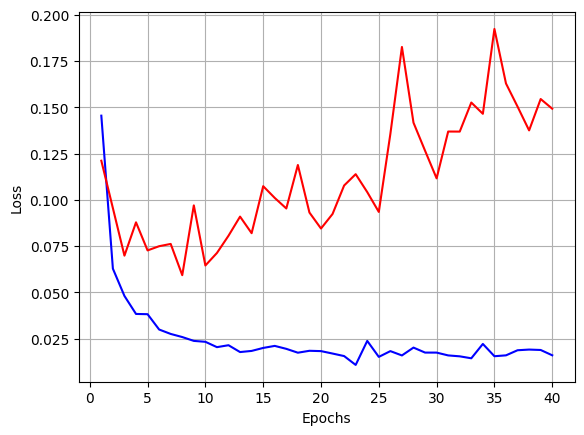

In [ ]:
plot_loss(train_loss, val_loss)

In [ ]:
torch.manual_seed(42)
model_1 = LeNet_5().to(device)
train_loss_1, val_loss_1 = train(model_1,
                                 X_train,
                                 y_train,
                                 batch_size=32,
                                 epochs=10)

Epochs: 1 | Training loss: 0.1563 | Validation loss: 0.1213
Epochs: 2 | Training loss: 0.0625 | Validation loss: 0.1201
Epochs: 3 | Training loss: 0.0465 | Validation loss: 0.1010
Epochs: 4 | Training loss: 0.0380 | Validation loss: 0.0807
Epochs: 5 | Training loss: 0.0334 | Validation loss: 0.0963
Epochs: 6 | Training loss: 0.0309 | Validation loss: 0.0814
Epochs: 7 | Training loss: 0.0247 | Validation loss: 0.0724
Epochs: 8 | Training loss: 0.0240 | Validation loss: 0.0856
Epochs: 9 | Training loss: 0.0204 | Validation loss: 0.0817
Epochs: 10 | Training loss: 0.0204 | Validation loss: 0.0822


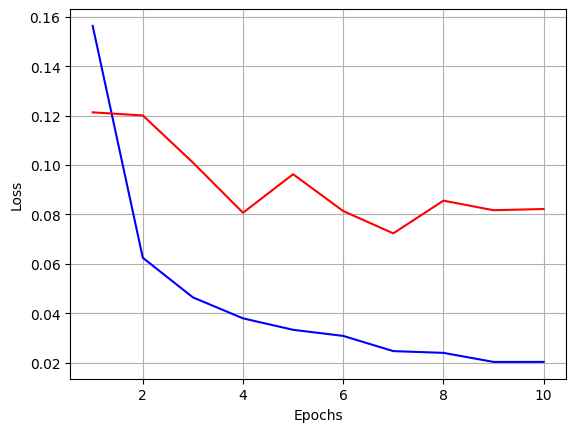

In [ ]:
plot_loss(train_loss_1, val_loss_1)

In [ ]:
train(model_1, X_train, y_train, batch_size=32, epochs=6, val_split=0)

([], [])

In [ ]:
with torch.inference_mode():
    model_1.eval()
    test_logits = model_1(X_test.reshape((-1, 1, 28, 28)))
    y_preds = torch.argmax(nn.Softmax(dim=-1)(test_logits), dim=-1).squeeze()

In [ ]:
correct = torch.eq(y_preds, y_test).sum().item()
acc = (correct / len(y_preds)) * 100
acc

98.89